<a href="https://colab.research.google.com/github/kaytlyn724/MAT422/blob/main/HW3.2_Continuity_and_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.2 Continunity and Differentiation**

---

### **Key Concepts:**

*   3.2.1. Limits and continuity
*   3.2.2. Derivatives
*   3.2.3. Taylor’s theorem

In [6]:
### important imports to run code ###

import numpy as np
import pandas as pd
import sympy as sp
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **3.2.1. Limits and Continuity**

**Limits and Continuity:** Limits are essential to calculus and mathematical analysis, and are used to define continuity, derivatives, and integrals. We often use the Euclidean norm image.png


A set A is closed if every limit point of A belongs to A. A set A is open if there is a $B_r(x)⊆A$ for all $x∈A$.

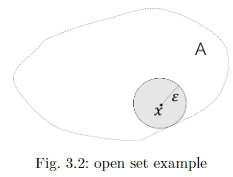


A set $A⊆ℝ^d$ is bounded if there exists an r>0 such that $A⊆B_r(0)$, where $0$=(0,...,0)$^T$

Limits of a function: Let $f: D→ℝ$ be a real-valued function on $D⊆ℝ^d$.

Then $f$ is said to have a limit $L∈ℝ$ as x approaches a if: for any $ε > 0$, there exists a $δ > 0$ such that $|f(x)−L|<ε$

for all $x∈D∩B_δ$ ($a$)\{$a$}

This is written as:

image.png

Continuous function is a function that does not have any abrupt changes in value, known as discontinuities. The definition of continuity of a function can be visualized by:

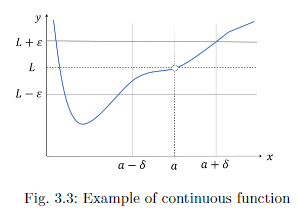

Continuous function: Let $f: D→ℝ$ be a real-valued function on $D⊆ℝ^d$. Then $f$ is said to be continuous at $a∈D$ if

image.png

Functions are often obtained from the composition of simpler ones. The standard notation $h=g◦f$ for the function $h(x) = g(f(x))$

Composition of Continuous Functions: Let f:$D_1→ℝ^m$, where $D_1⊆ℝ^d$, and let g$:D_2ℝ^p$, where $D_2⊆ℝ^m$. Assume that f is continuous at $x_0$ and that g is continuous $f(x_0)$. Then $g◦f$ is continuous at $x_0$

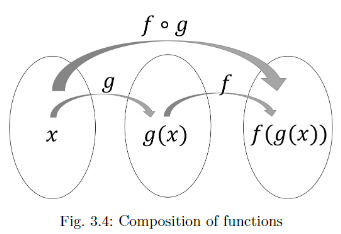

In [9]:
# Define the variable and function
x = sp.Symbol('x')
f = sp.Function('f')(x)

# Example function: f(x) = (x^2 - 1) / (x - 1)
f_expr = (x**2 - 1) / (x - 1)
print(f"f(x): {f_expr}")

# Calculate limit as x approaches 1
limit_at_1 = sp.limit(f_expr, x, 1)
print(f"Limit of f(x) as x approaches 1: {limit_at_1}")

# Checking continuity: If the limit at a point equals the function value
f_continuous_at_1 = sp.limit(f_expr, x, 1) == f_expr.subs(x, 1)
print(f"Is the function continuous at x=1? {f_continuous_at_1}")

f(x): (x**2 - 1)/(x - 1)
Limit of f(x) as x approaches 1: 2
Is the function continuous at x=1? False


## **3.2.2. Derivatives**

**Derivatives:** the derivative of a function of a real variable measures the sensitivity to change of the function value (output value) with respect to another variable.

Derivative: Let $f:D→ℝ$  where $D⊆ℝ$ and let $x_0∈D$ be an interior point of D. The derivative of $f$ at $x_0$ is

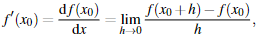

provided the limit exists.

The definition of derivative of a function can be illustrated in:

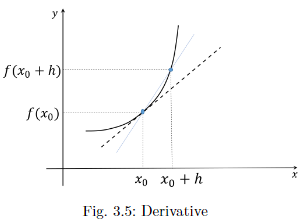

Let $f$ and $g$ have derivatives at x and let $α$ and $β$ be constants. The following holds:

image.png

The derivative of $f$ at $x_0$ tells us where to find extreme values.

Partial Derivative: Let $f:D→ℝ$  where $D⊆ℝ^d$ and let $x_0∈D$ be an interior point of D. The partial derivative of $f$ at $x_0$ with respect to $x_i$ is

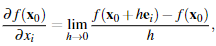

provided the limit exists. If image.png exists and is continuous in an open ball around $x_0$ for all $i$, then we say that $f$ continuously differentiable at $x_0$.

Directional Derivative: Let $f:D→ℝ$  where $D⊆ℝ^d$ and let $x_0∈D$ be an interior point of D and let $v∈ℝ^d$ be a unit vector. The directional derivative of $f$ at $x_0$ in the direction $v$ is

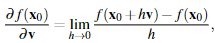

provided the limit exists.

In [10]:
# Derivative of a function f(x) = x^2 + 4x + 2
f = x**2 + 4*x + 2
print(f"f(x): {f}")

# Derivative of f with respect to x
f_prime = sp.diff(f, x)
print(f"Derivative of f(x): {f_prime}")

# Partial derivative for multivariable function f(x, y) = x^2 + y^2
y = sp.Symbol('y')
f_multi = x**2 + y**2
print(f"\nf(x): {f_multi}")
partial_x = sp.diff(f_multi, x)
partial_y = sp.diff(f_multi, y)
print(f"Partial derivative with respect to x: {partial_x}")
print(f"Partial derivative with respect to y: {partial_y}")

# Directional derivative: Find derivative of f(x, y) in the direction of vector (2, 1)
v = sp.Matrix([2, 1])
grad_f = sp.Matrix([sp.diff(f_multi, x), sp.diff(f_multi, y)])
directional_derivative = grad_f.dot(v)
print(f"Directional derivative in direction (2, 1): {directional_derivative}")

f(x): x**2 + 4*x + 2
Derivative of f(x): 2*x + 4

f(x): x**2 + y**2
Partial derivative with respect to x: 2*x
Partial derivative with respect to y: 2*y
Directional derivative in direction (2, 1): 4*x + 2*y


## **3.2.3. Taylor's Theorem**

**Taylor's Theorem:** Gives an approximation of a differentiable function around a given point by a polynomial. This is also a powerful generalization of the Mean value Theorem.

Taylor: Let $f:D→ℝ$  where $D⊆ℝ$. Suppose $f$ has a $m$ times continuous derivative on $[a,b]$. Then

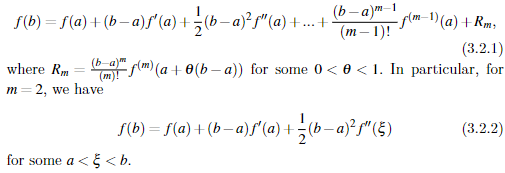

Multivariate Taylor: Let $f:D→ℝ$ where $D⊆ℝ^d$. Let $x_0∈D$ and $δ > 0$ be such that $B_δ(x_0)⊆D$ If $f$ is three times continuously differentiable on $B_δ(x_0)$, then for any $x∈B_δ(x_0)$

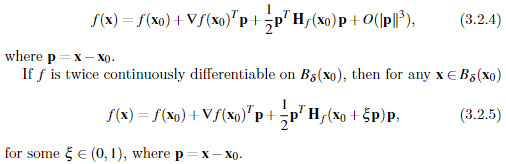

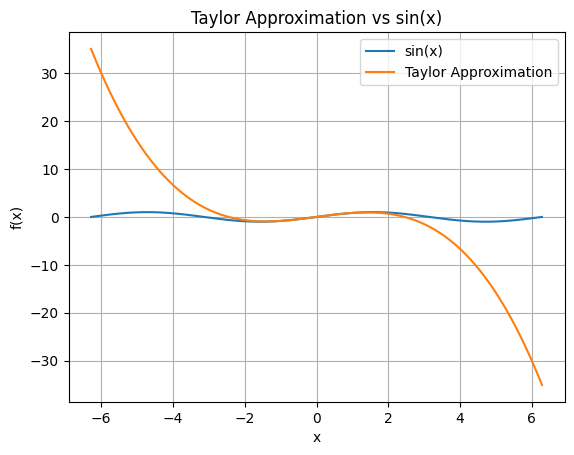

In [18]:
# f(x) = sin(x) returning the sin of x
def f(x):
    return np.sin(x)

# Taylor approximation of sin(x) around x=0
def taylor_sin_approx(x, order=4):
    return x - (x**3)/6

# Generate values of x for plotting
x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 400)
f_vals = f(x_vals)
taylor_vals = taylor_sin_approx(x_vals)

# Plot the function and the Taylor approximation
# This shows how well the taylor approximation matches sin(x) near 0,
# and how it deviates as it gets farther away from 0
plt.plot(x_vals, f_vals, label="sin(x)")
plt.plot(x_vals, taylor_vals, label="Taylor Approximation")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Taylor Approximation vs sin(x)")
plt.grid(True)
plt.show()